# Monte-Carlo

In [10]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Ein ganz anderer Ansatz zur Integration wird mit dem [Monte-Carlo-Ansatz](https://de.wikipedia.org/wiki/Monte-Carlo-Algorithmus) verfolgt. Hierbei werden Zufallspunkte $\sf x_i$ innerhalb der gesuchten Integralbereichs generiert. Der Mittelwert der dazugehörigen Summe der Funktionswerte $\sf f(x_i)$ nähert das Integral an. Insbesondere für eine kleine Anzahl von Zufallswerten kann das Ergebnis deutlich vom exakten Wert abweichen. Der Vorteil des Verfahrens wird bei hochdimensionalen Integralen deutlich.

Für $\sf n \gg 1$ zufällige Stützstellen $\sf x_i \in [a, b]$ gilt folgende Näherung

$$\sf I = \int_a^b f(x)\ dx \approx \frac{b-a}{n}\sum_{i=1}^n f(x_i) $$

Für das Beispiel aus den vorhergehenden Kapiteln gilt

In [11]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung
I_exakt = (-1/3*np.cos(3*2) + 2**2) - (-1/3)

In [19]:
n = 2000
xi = np.random.random(n) * 2
yi = fkt(xi)
I = 2 * 1/n * np.sum(yi)
print(f"Integralwert für {n} Stützstellen: {I:.4f}")

Integralwert für 2000 Stützstellen: 3.9718


In [38]:
n_max = 50000
ns = np.arange(2, n_max, 25, dtype=np.int)
mc = np.zeros(len(ns))

for i, n in enumerate(ns):
    xi = np.random.random(n)*2
    yi = fkt(xi)
    mc[i] = 2 * 1/n * np.sum(yi)

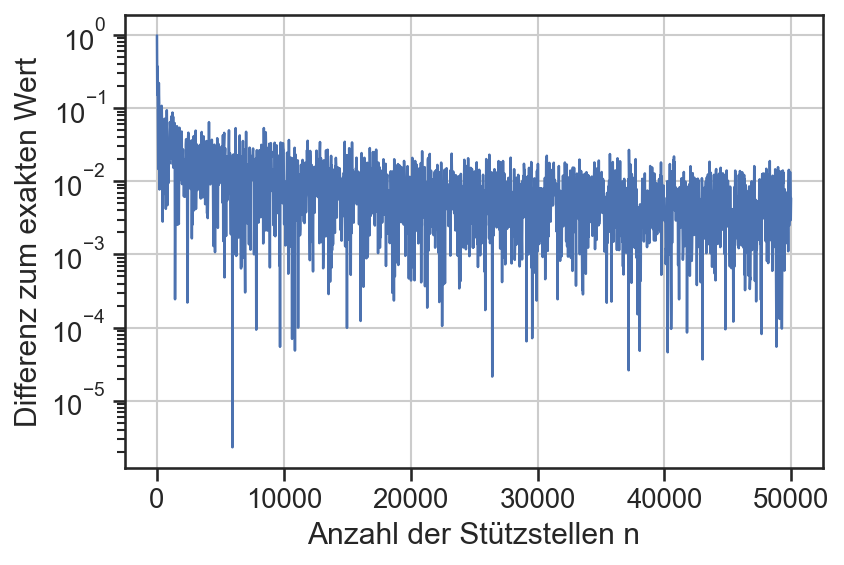

In [39]:
plt.plot(ns, np.abs(mc-I_exakt))

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Differenz zum exakten Wert')

# plt.xscale('log')
plt.yscale('log')

plt.grid();

Alternativ kann auch das Flächenverhältnis zwischen der zu integrierenden Funktion und einer Referenzfläche $\sf A_r$ gebildet werden. Hierzu werden $\sf n$ Zufallszahlenpaare $\sf (x_i, y_i)$ generiert und gezählt wieviele davon in der gesuchten Fläche liegen. Die Annahme ist, dass sich beide Verhältnisse für große $\sf n$ annähern.

$$\sf I \approx \frac{A_r \cdot \left|y_i | y_i < f(x_i)\right|}{n} $$

Im obigen Beispiel kann die Fläche $\sf[0, 2] \times [0, 4] = 8$ als Referenzfläche verwendet werden.

In [40]:
n = 2000
xi = np.random.random(n) * 2
yi = np.random.random(n) * 4

z = np.sum(yi < fkt(xi))

I = z / n * 8
print(f"Integralwert für {n} Stützstellen: {I}")

Integralwert für 2000 Stützstellen: 4.056


In [41]:
n_max = 50000
ns = np.arange(2, n_max, 25, dtype=np.int)
mc = np.zeros(len(ns))

for i, n in enumerate(ns):
    xi = np.random.random(n) * 2
    yi = np.random.random(n) * 4
    z = np.sum(yi < fkt(xi))
    mc[i] = z / n * 8

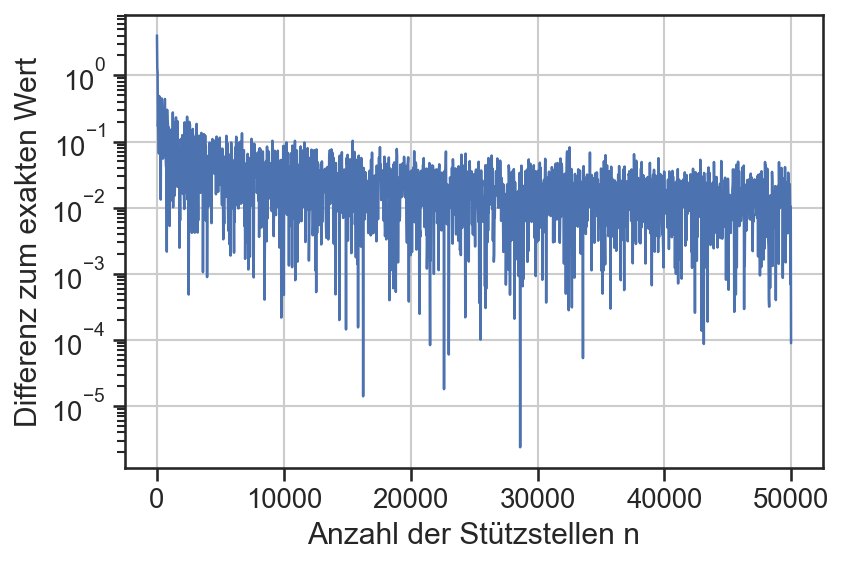

In [42]:
plt.plot(ns, np.abs(mc-I_exakt))

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Differenz zum exakten Wert')

# plt.xscale('log')
plt.yscale('log')

plt.grid();